In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import matplotlib.pyplot as plt
import torch

from agent import Agent, add_noise
from hill_climbing import perform_hill_climbing

https://openai.com/requests-for-research/#cartpole

## Explore `gym` and the `CartPole-v0` environment

In [3]:
env = gym.envs.make('CartPole-v0')

/anaconda3/envs/drl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
env.reset()

array([ 3.50354636e-02, -3.63567353e-02,  1.40665335e-02,  7.12239863e-05])

In [5]:
env.action_space

Discrete(2)

In [6]:
env.observation_space

Box(4,)

Watch an untrained agent

In [7]:
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=16)
cartpole_agent.watch_me(env, steps=300)

## Apply Hill Climbing Algorithm to solve Environment

In [8]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=2)
n_episodes = 1000
initial_noise_std = 0.01

In [9]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  initial_noise_std=initial_noise_std,
                                                  population_size=1)

Start with Return Estimate G = 28.0
Episode 5 - Improved G to G_best = 31.0
Episode 25 - Improved G to G_best = 37.0
Episode 32 - Improved G to G_best = 83.0
Episode 33 - Improved G to G_best = 93.0
Episode 34 - Improved G to G_best = 108.0
Episode 40 - Improved G to G_best = 200.0


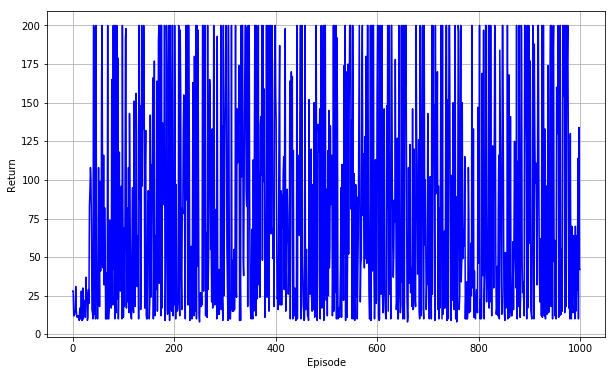

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

Watch a (slightly) improved agent

In [13]:
opt_agent.watch_me(env, steps=300)

## Change over to Steepest Ascent Hill Climbing and its Flavors

### without adaptive noise

In [14]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=16)
n_episodes = 250
initial_noise_std = 0.01
population_size = 30
use_adaptive_noise = False

In [15]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise)

Start with Return Estimate G = 55.0
Episode 0 - Improved G to G_best = 80.0
Episode 8 - Improved G to G_best = 91.0
Episode 17 - Improved G to G_best = 115.0
Episode 31 - Improved G to G_best = 117.0
Episode 174 - Improved G to G_best = 118.0


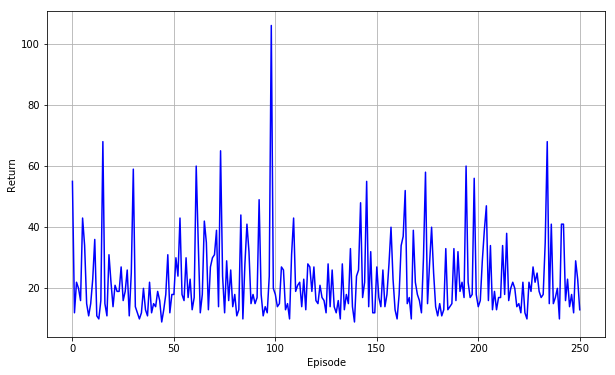

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [17]:
opt_agent.watch_me(env, steps=300)

### with adaptive noise

In [18]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=16)
n_episodes = 250
initial_noise_std = 0.01
population_size = 30
use_adaptive_noise = True

In [19]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise)

Start with Return Estimate G = 16.0
Episode 0 - Improved G to G_best = 70.0
Episode 2 - Improved G to G_best = 73.0
Episode 6 - Improved G to G_best = 75.0
Episode 10 - Improved G to G_best = 96.0
Episode 13 - Improved G to G_best = 97.0
Episode 14 - Improved G to G_best = 136.0
Episode 15 - Improved G to G_best = 181.0
Episode 17 - Improved G to G_best = 200.0


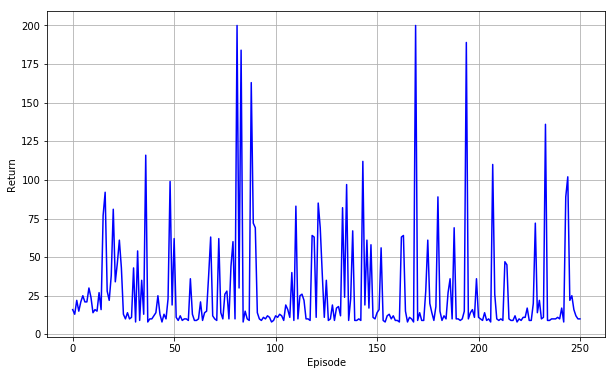

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [21]:
opt_agent.watch_me(env, steps=300)

### Use Cross Entropy Metod

In [27]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=2)
n_episodes = 200
initial_noise_std = 0.01
population_size = 30
cem_frac = 0.25
use_adaptive_noise = False
use_cem = True

In [28]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  cem_frac=cem_frac,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise,
                                                  use_cem=use_cem)

Start with Return Estimate G = 33.0
Episode 0 - Improved G to G_best = 41.142857142857146
Episode 1 - Improved G to G_best = 44.142857142857146
Episode 2 - Improved G to G_best = 47.0
Episode 6 - Improved G to G_best = 53.285714285714285
Episode 52 - Improved G to G_best = 54.142857142857146
Episode 99 - Improved G to G_best = 58.42857142857143
Episode 185 - Improved G to G_best = 63.57142857142857


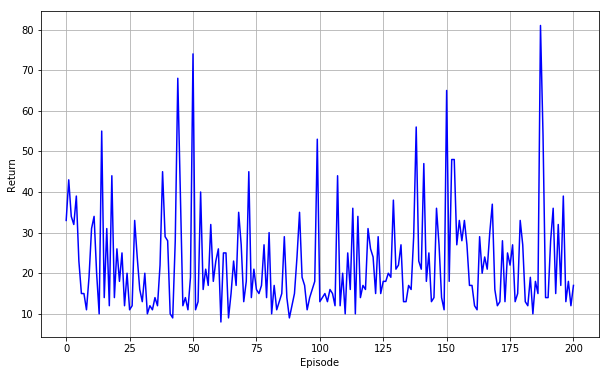

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [ ]:
opt_agent.watch_me(env, steps=300)

## Use Evolution Strategy

In [31]:
torch.random.manual_seed(42)
cartpole_agent = Agent(state_size=env.observation_space.shape[0],
                       action_size=env.action_space.n,
                       hidden_size_1=4)
n_episodes = 250
initial_noise_std = 0.01
population_size = 20
use_adaptive_noise = True
use_evolution = True

In [32]:
opt_agent, return_history = perform_hill_climbing(cartpole_agent, env, n_episodes=n_episodes,
                                                  population_size=population_size,
                                                  initial_noise_std=initial_noise_std,
                                                  use_adaptive_noise=use_adaptive_noise,
                                                  use_evolution=use_evolution)

Start with Return Estimate G = 31.0
Episode 1 - Improved G to G_best = 54.0
Episode 6 - Improved G to G_best = 61.0
Episode 12 - Improved G to G_best = 70.0
Episode 17 - Improved G to G_best = 109.0
Episode 18 - Improved G to G_best = 200.0


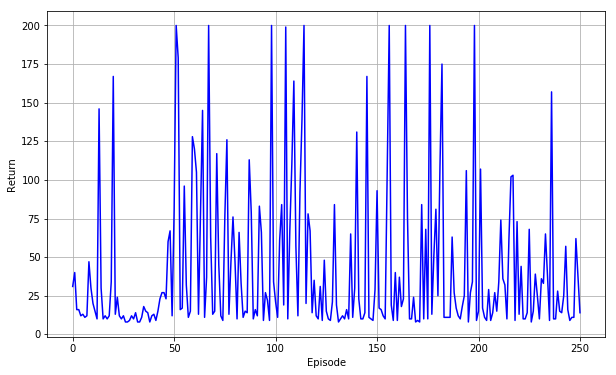

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(return_history)), return_history, 'b-')
plt.grid(True)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.show()

In [34]:
opt_agent.watch_me(env, steps=300)

## Hm, that still doesn't look nice

Eventually, the search space for the stochastic policy search is too complex and reducing the set of parameters might help